# Dealing with multiple classes
In practice it can happen that our data does not contain a single class of objects. In fact, we know that proteins are dynamic structures and that each image we get is slightly different. Sometimes proteins can undergo large wnough conformational changes that we can identify discrete states of the molecule as different classes in our data. In this bonus problem we will tackle a case where we will mix $K$ classes of particles together, and we will use a classification method to see if we can get those classes back out again

In [1]:
from shared.singleparticle import make_letter
from shared.useful_functions import *
import numpy as np
import matplotlib.pyplot as plt
import string
import random
%matplotlib inline

## make a data set
Let's first make a data set containing multiple classes

(200, 128, 128)


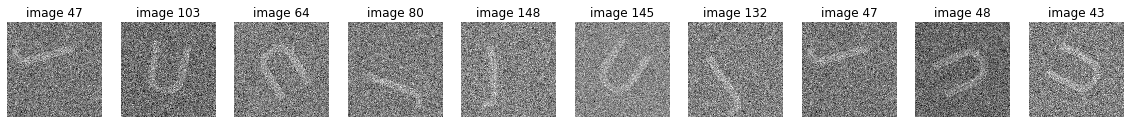

In [30]:
# making data set
K = 2 # number of classes
N = 200 # total number of samples
sigma = 1 # noise level
alphabet = string.ascii_uppercase
true_angles = np.random.uniform(0, 360, N) # these are the true angles of the particles
true_classes = np.random.choice(K, N) # these are the true classes of the particles
images_stack = []

im_classes = []
letters = []
for k in range(K):
    letter = random.choice(alphabet)
    letters.append(letter)
    alphabet.replace(letter, "") # remove the letter from the alphabet
    im = make_letter(letter, size=128)
    im_classes.append(im)

for angle, class_idx in zip(true_angles, true_classes):
    image_rotated = ndimage.interpolation.rotate(im_classes[class_idx], angle, reshape=False)
    image_rotated_noisy = image_rotated + sigma * np.random.randn(*im.shape)
    images_stack.append(image_rotated_noisy)
images_stack = np.array(images_stack)
print(images_stack.shape)

fig, ax = plt.subplots(1, 10, figsize=(20, 10))
for ii, i in enumerate(np.random.randint(0, images_stack.shape[0], 10)):
    ax[ii].imshow(images_stack[i], cmap="gray", interpolation="none", origin="lower")
    ax[ii].axis("off")
    ax[ii].set_title("image {}".format(i))

# Reconstruction without classification
Let's see how well the algorithm does at reconstructing the dataset as if it was homogeneous. Paste your reconstruction algorithm from the main notebook below and make a reconstruction from the iamges.

In [ ]:
# code


# classification method
For the classification we will expand the reconstruction algorithm in the following way. We start by selecting $K$ (different) references. We can then compare each image to a rotated stack for each reference. Then we have to both assign each image the best rotation angle and the class it belongs to, based on which reference and under what rotation the image aligns most to. In Bayesian terms we say that we have to both infer the particles' orientation and class assignment. After we have done this, we can make a reconstruction of each class based on the particles that were assigned to it and their rotation angles.\

In the end, show that you can make a reconstruction for each letter in your data. Make sure that the algorithm works when you change the number of classes. Also show a plot of the estimates class assignment vs. the true class assignment to see how well your algorithm separates the two classes.

In [ ]:
# code
